In [1]:
import os

models_paths = [os.environ["DATA"] + "/02_popalg_exploration/paper/03_CLScore_opt/08.01_GDB_like_CLScore_opt_from_none_pop_200000"]

model_names = ["CLScore_GDB_like_200k"]

output_fig_dir = os.environ["FIGURES"] + "/02_popalg_exploration/paper/03_CLScore_opt/08.01_GDB_like_CLScore_opt_from_none_pop_200000"


In [2]:
from qupopalg.plot_results import extract_data_multiple_models

union_models_data_dict = extract_data_multiple_models(models_paths, model_names, fix_dict={"scf": "scaf", 
                                                                                           "ifg": "efg",
                                                                                           "max": "best"})

### Fixing SAScore

In [3]:
for k in union_models_data_dict.keys():
    for k_df in union_models_data_dict[k].keys():
        if "SAScore" in k_df and "std" not in k_df:
            union_models_data_dict[k][k_df] = -union_models_data_dict[k][k_df] 
    

### Potting time vs step

In [4]:
from qupopalg.plot_results import plot_time_vs_step

plot_time_vs_step(union_models_data_dict, output_fig_dir)


<Figure size 432x288 with 0 Axes>

### Plotting objective functions vs step 

In [5]:
from qupopalg.plot_results import plot_steps_property

plot_steps_property(union_models_data_dict, "CLScore", ["best", "mean"], ["CLScore_best", "CLScore_mean"],
                    output_dir_path=output_fig_dir)

<Figure size 432x288 with 0 Axes>

### Plotting all properties vs step 

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

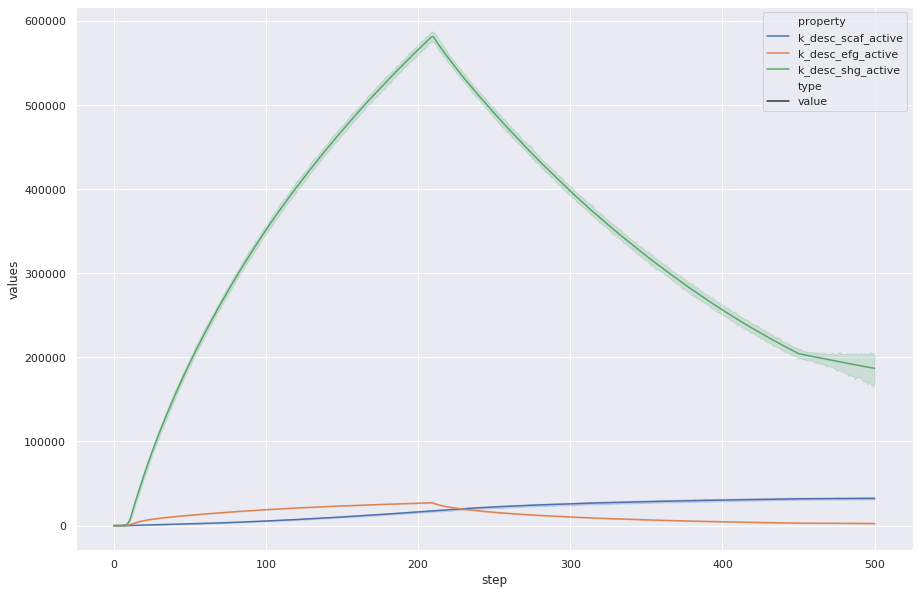

In [6]:
from qupopalg.plot_results import plot_steps_multi_properties

union_models_data_dict["steps"]["k_desc_scaf_active_value"] = union_models_data_dict["steps"]["k_desc_scaf_active_desc"] 
union_models_data_dict["steps"]["k_desc_efg_active_value"] = union_models_data_dict["steps"]["k_desc_efg_active_desc"] 
union_models_data_dict["steps"]["k_desc_shg_active_value"] = union_models_data_dict["steps"]["k_desc_shg_active_desc"] 


plot_steps_multi_properties(union_models_data_dict, ["qed", "penalized_logP", "CLScore", "SAScore"], ["best", "mean"], output_fig_dir+"/prop/")
plot_steps_multi_properties(union_models_data_dict, ["k_desc_scaf_active", "k_desc_efg_active", "k_desc_shg_active"], ["value"], output_fig_dir+"/prop_desc/")


### Plotting property distribution

<Figure size 432x288 with 0 Axes>

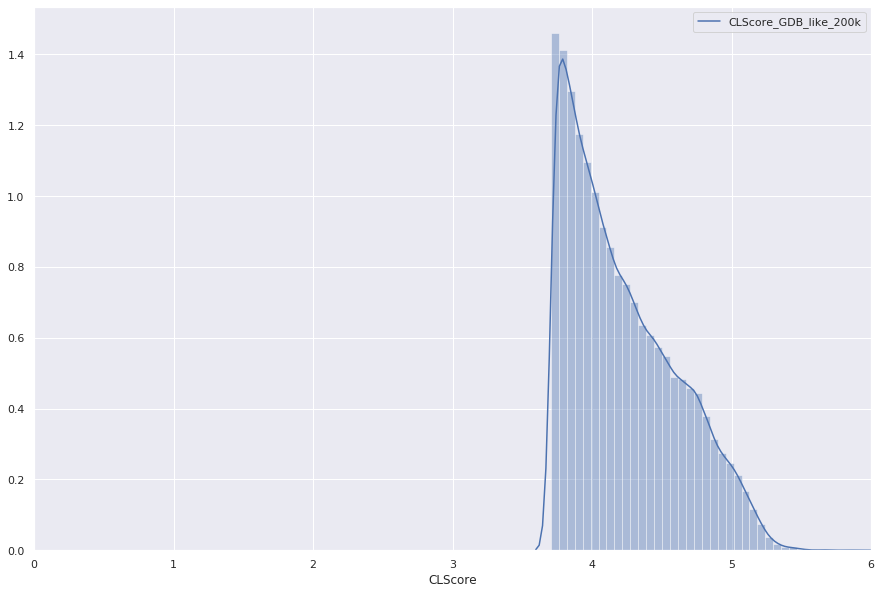

In [7]:
from qupopalg.plot_results import plot_prop_distribution_pop

plot_prop_distribution_pop(union_models_data_dict, "CLScore", output_fig_dir, run="0", xlim=(0, 6))

### Plotting objective function vs time

In [8]:
plot_steps_property(union_models_data_dict, "CLScore", ["best", "mean"], ["CLScore_best", "CLScore_mean"],
                    output_dir_path=output_fig_dir, x_key="timestamps")

<Figure size 432x288 with 0 Axes>

### Plotting # no ind replaced

<Figure size 432x288 with 0 Axes>

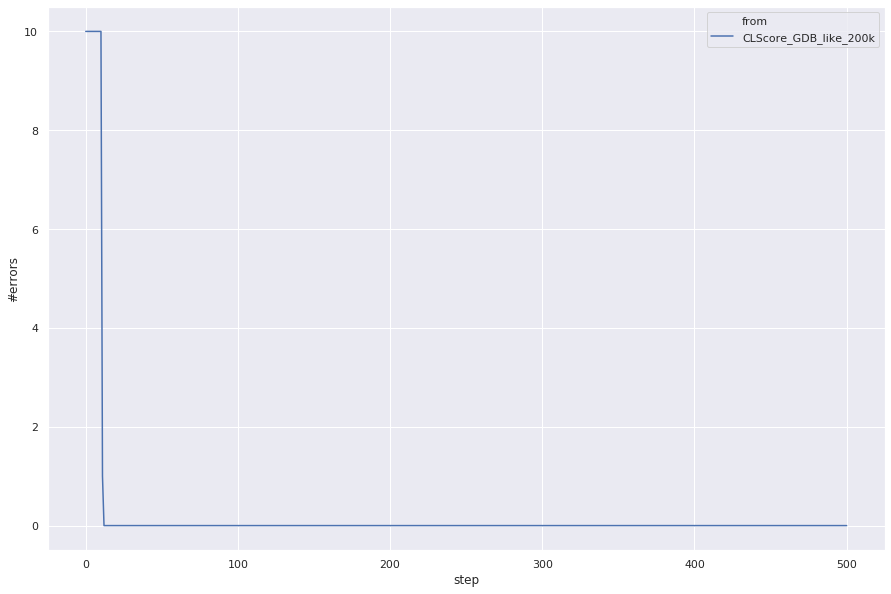

In [9]:
from qupopalg.plot_results import plot_n_errors_per_step

plot_n_errors_per_step(union_models_data_dict, "No individual replaced", model_names=model_names, output_dir_path=output_fig_dir)

### Plotting # MM errors vs step

<Figure size 432x288 with 0 Axes>

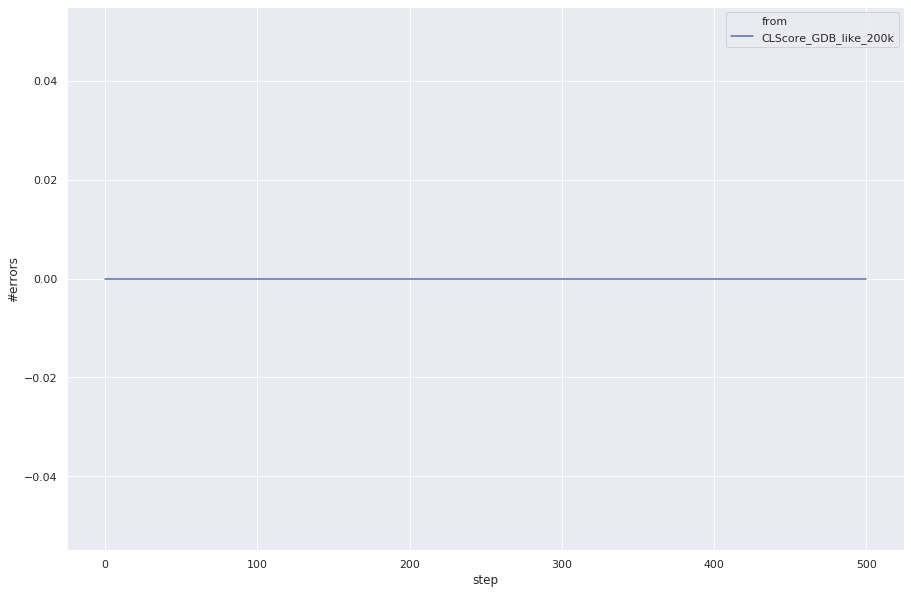

In [10]:
from qupopalg.plot_results import plot_n_errors_per_step

plot_n_errors_per_step(union_models_data_dict, "MM", model_names=model_names, output_dir_path=output_fig_dir)